# t-sne Visualizer

- Pull in vectors of studies
- t-sne plot

### Choose Experiment Group & ID

In [29]:
exp_group = 'cnn-siamese'
exp_id = 0

### Load Study Vectors

In [30]:
X = pickle.load(open('../../visualization/store/study_vecs/{}/{}.p'.format(exp_group, exp_id))).astype('float64')

X.shape

(788, 999)

### Load Corresponding `CDNO`s

In [31]:
top_k = 2

df = pd.read_csv('../../preprocess/pico_cdsr.csv', index_col=0)
top_cdnos = set(df.groupby('cdno').size().sort_values(ascending=False).index[:top_k])
df = df[df.cdno.map(lambda cdno: cdno in top_cdnos)] # throw out studies we are not using
train_idxs = np.array(df.index) # get study indices so we can index into vectorized data
cdnos = df.reset_index(drop=True).cdno # get cdnos so we can map studies to their cdno

top_cdnos

{'CD002967', 'CD004125'}

### t-sne plot

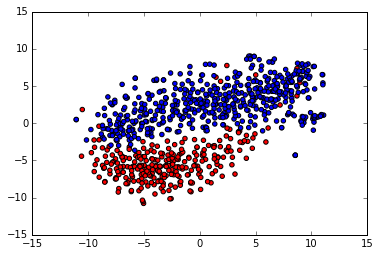

In [32]:
from tsne import bh_sne

X = bh_sne(X)

cmap = {cdno: color for cdno, color in zip(top_cdnos, ['red', 'blue'])}
plt.scatter(x=X[:, 0], y=X[:, 1], c=cdnos.map(cmap))